# Problem Statement

In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import networkx as nx
from random import sample
from tqdm import tqdm 
import numpy as np 
from  itertools import combinations
from tqdm import tqdm 
from sklearn.metrics import accuracy_score

## Importing the dataset 

In [2]:
bio_decagon_combo = pd.read_csv("bio-decagon-combo.csv")


### Creatring a drug network 

In [3]:
G = nx.from_pandas_edgelist(bio_decagon_combo,source = "STITCH 1",target="STITCH 2")

In [4]:
all_drugs = list(G.nodes())

### Unique drug pairs

In [5]:
l  = list(G.edges())

In [6]:
d1  = [i[0] for i in l ]
d2 = [i[1] for i in l ]

In [7]:
drug = pd.DataFrame()

In [8]:
drug["Drug1"]  = d1
drug["Drug2"]  = d2
drug["is_edge"] = 1

In [9]:
drug

,Drug1,Drug2,is_edge
0,CID000002173,CID000003345,1
1,CID000002173,CID000004873,1
2,CID000002173,CID000000853,1
3,CID000002173,CID000003016,1
4,CID000002173,CID000001690,1
...,...,...,...
63468,CID000004819,CID000005593,1
63469,CID000000119,CID000002274,1
63470,CID000004425,CID000119182,1
63471,CID000003494,CID000060696,1


 ## Negative Sampling 
- Find all the combination of drugs 
- Eliminate the existent edges 
- Sample same number of edges which are exitent 

In [10]:
all_drugs = list(np.unique(drug["Drug1"]))
all_drugs.extend(list(np.unique(drug["Drug2"])))

In [11]:
existent_pairs_1 = set(zip(drug["Drug1"],drug["Drug2"]))
existent_pairs_2 = set(zip(drug["Drug2"],drug["Drug1"]))

In [12]:






all_possible_combination = set(combinations(all_drugs,2))
non_pairs = all_possible_combination - existent_pairs_1
non_pairs =  non_pairs - existent_pairs_2
non_sample = sample(non_pairs,63473) 


final_ = []
for i in non_sample:
    if i[0] != i[1]:
        final_.append((i[0],i[1]))
    else:
        continue
        
        


/tmp/ipykernel_94/1238172142.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  non_sample = sample(non_pairs,63473)


In [13]:
non_sample_df=pd.DataFrame()
non_sample_df["Drug1"] = [i[0] for i in final_ ]
non_sample_df["Drug2"] = [i[1] for i in final_ ]

In [14]:
non_sample_df["is_edge"] = 0
final_dt = drug.append(non_sample_df)


/tmp/ipykernel_94/3251133744.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dt = drug.append(non_sample_df)


### Nodes level statistics 

 **Number of Neighbors**

## Degree

In [16]:
degrees = dict(G.degree())
final_dt["Drug1_degree"] =final_dt["Drug1"].map(degrees)
final_dt["Drug2_degree"] =final_dt["Drug1"].map(degrees)

[]

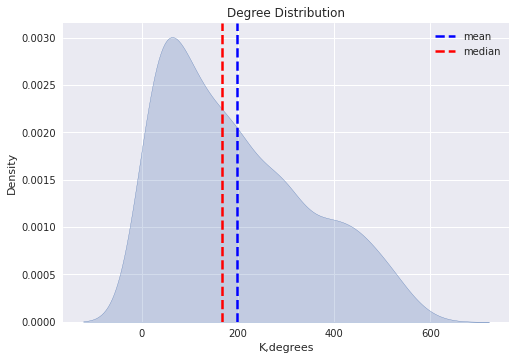

In [323]:
plt.title("Degree Distribution")
sns.kdeplot(degrees.values(),fill = True)
plt.axvline(x=np.mean(list(degrees.values())),
            color='blue',
            ls='--', 
            lw=2.5,label = "mean")

plt.axvline(x=np.median(list(degrees.values())),
            color='red',
            ls='--', 
            lw=2.5,label = "median")
plt.xlabel("K,degrees")
plt.legend()
plt.plot()

## Clustering Coefficient

In [30]:
cc = nx.clustering(G)

In [380]:
np.median(list((cc.values())))

0.8661110364296276

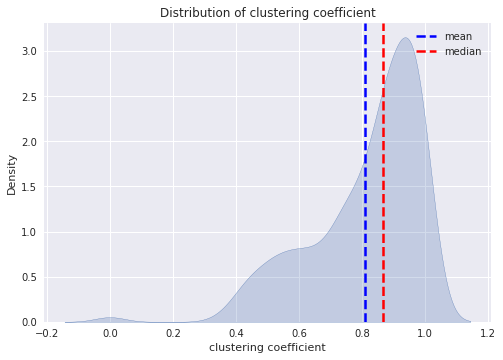

In [326]:
plt.title("Distribution of clustering coefficient")
sns.kdeplot(cc.values(),fill = True)
plt.axvline(x=np.mean(list((cc.values()))),
            color='blue',
            ls='--', 
            lw=2.5,label = "mean")
plt.axvline(x=np.median(list((cc.values()))),
            color='red',
            ls='--', 
            lw=2.5,label = "median")
plt.xlabel("clustering coefficient")
plt.legend()
plt.show()

In [32]:
final_dt["Drug1_clustering_coeficient"] = final_dt["Drug1"].map(cc)
final_dt["Drug2_clustering_coeficient"] = final_dt["Drug2"].map(cc)

## eigenvector_centrality

In [34]:
ec = nx.eigenvector_centrality(G)

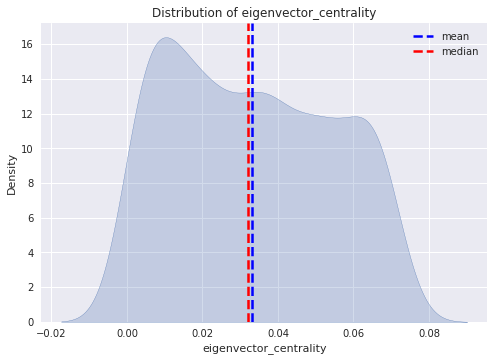

In [327]:
plt.title("Distribution of eigenvector_centrality")
sns.kdeplot(ec.values(),fill=True)
plt.axvline(x=np.mean(list((ec.values()))),
            color='blue',
            ls='--', 
            lw=2.5,label = "mean")

plt.axvline(x=np.median(list((ec.values()))),
            color='red',
            ls='--', 
            lw=2.5,label = "median")
plt.xlabel("eigenvector_centrality")
plt.legend()
plt.show()

In [377]:
np.median(list((ec.values())))

0.03206910464409352

In [36]:
final_dt["Drug1_eigenvector_centrality"] = final_dt["Drug1"].map(ec)
final_dt["Drug2_eigenvector_centrality"] = final_dt["Drug2"].map(ec)

## Betweenness_centrality

In [24]:
betweenness_centrality = nx.betweenness_centrality(G) 

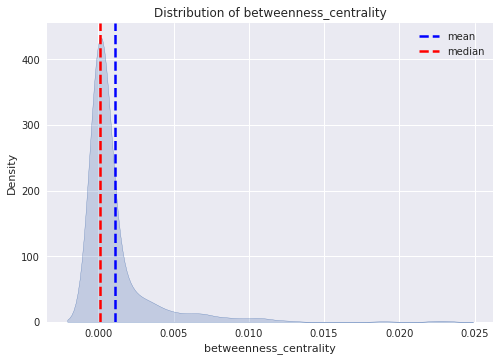

In [330]:
plt.title("Distribution of betweenness_centrality")
sns.kdeplot(betweenness_centrality.values(),fill =True)
plt.axvline(x=np.mean(list((betweenness_centrality.values()))),
            color='blue',
            ls='--', 
            lw=2.5,label = "mean")
plt.axvline(x=np.median(list((betweenness_centrality.values()))),
            color='red',
            ls='--', 
            lw=2.5,label = "median")
plt.xlabel("betweenness_centrality")
plt.legend()

plt.show()

In [28]:
final_dt["Drug1_betweenness_centrality"] = final_dt["Drug1"].map(betweenness_centrality)
final_dt["Drug2_betweenness_centrality"] = final_dt["Drug2"].map(betweenness_centrality)

## jaccard_coefficient

In [40]:
drug_pair = list(zip(final_dt["Drug1"],final_dt["Drug2"]))

In [41]:
jj = nx.jaccard_coefficient(G,drug_pair)

In [42]:
dd= {}

for i,j,p in jj:
    dd[(i,j)] = p 

In [43]:
final_dt["jacard_score"]  =dd.values()

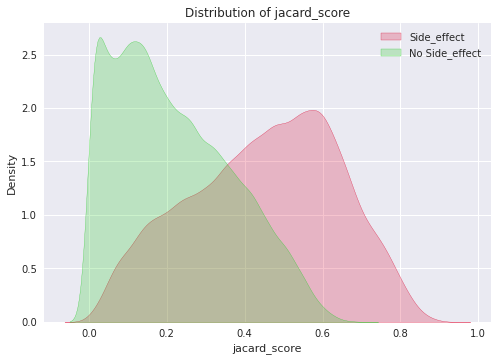

In [331]:

plt.title("Distribution of jacard_score")
sns.kdeplot(final_dt["jacard_score"][final_dt["is_edge"]==1],color='crimson', label='Side_effect',fill=True)
sns.kdeplot(final_dt["jacard_score"][final_dt["is_edge"]==0],color='limegreen', label='No Side_effect',fill=True)
plt.legend()
plt.show()

## adamic_adar_index
- account for the 0 


In [45]:
aa= nx.adamic_adar_index(G,drug_pair)

In [46]:
aa_= []

for i,j,p in aa:
    aa_.append(p)
    
    

In [47]:
final_dt["adamic_adar_index"] = aa_

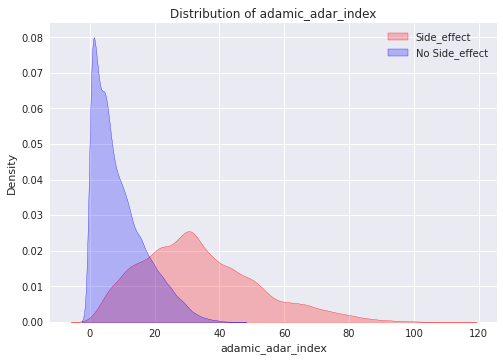

In [332]:



plt.title("Distribution of adamic_adar_index")
sns.kdeplot(final_dt["adamic_adar_index"][final_dt["is_edge"]==1],color='red', label='Side_effect',fill=True)
sns.kdeplot(final_dt["adamic_adar_index"][final_dt["is_edge"]==0],color='blue', label='No Side_effect',fill=True)
plt.legend()
plt.show()

## preferential_attachment

In [49]:
pa = nx.preferential_attachment(G,drug_pair)

In [50]:
pa_= {}

for i,j,p in pa:
    pa_[(i,j)] = p 

In [51]:
final_dt["preferential_attachment"] = pa_.values()

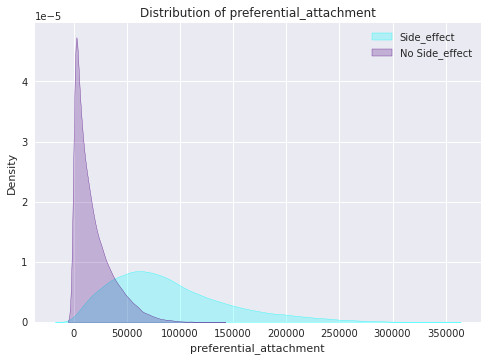

In [343]:



plt.title("Distribution of preferential_attachment")
sns.kdeplot(final_dt["preferential_attachment"][final_dt["is_edge"]==1],color='cyan', label='Side_effect',fill=True)
sns.kdeplot(final_dt["preferential_attachment"][final_dt["is_edge"]==0],color='indigo', label='No Side_effect',fill=True)
plt.legend()
plt.show()

## Cosine Similarity 

In [76]:
def cosine_similarity(n1,n2):
    num_of_neigbour = len(list(nx.common_neighbors(G,n1,n2)))
    GM = np.sqrt(list(nx.degree(G, [n1]))[0][1]) * np.sqrt(list(nx.degree(G, [n2]))[0][1])
    return num_of_neigbour/GM 

In [84]:
cm = []
for i in tqdm(list(zip(final_dt["Drug1"],final_dt["Drug2"]))):
    cm.append(cosine_similarity(i[0],i[1]))
    

100%|██████████| 126813/126813 [00:36<00:00, 3453.80it/s]


In [86]:
final_dt["Cosine_similarity"] = cm 

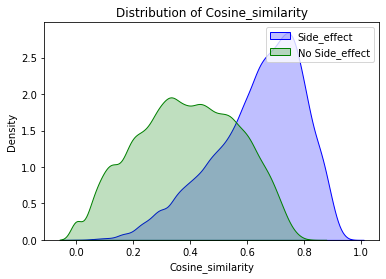

In [11]:
plt.title("Distribution of Cosine_similarity")
sns.kdeplot(final_dt["Cosine_similarity"][final_dt["is_edge"]==1],color='blue', label='Side_effect',fill=True)
sns.kdeplot(final_dt["Cosine_similarity"][final_dt["is_edge"]==0],color='green', label='No Side_effect',fill=True)
plt.legend()
plt.show()

## Common Neigbours 

In [112]:
def num_common_neigbours(n1,n2):
    return len(list(nx.common_neighbors(G,n1,n2)))

In [113]:
num_c_neigh = []
for i in tqdm(list(zip(final_dt["Drug1"],final_dt["Drug2"]))):
    num_c_neigh.append(num_common_neigbours(i[0],i[1]))

100%|██████████| 126813/126813 [00:31<00:00, 3968.73it/s]


In [115]:
final_dt["num_common_neigbours"] = num_c_neigh

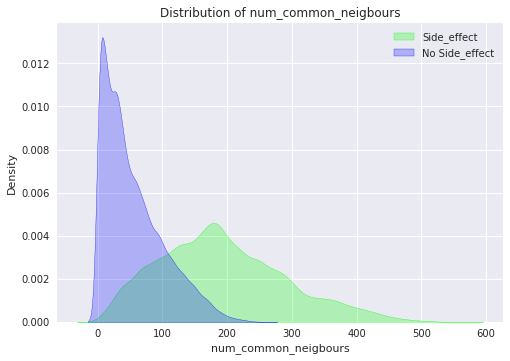

In [344]:
plt.title("Distribution of num_common_neigbours")
sns.kdeplot(final_dt["num_common_neigbours"][final_dt["is_edge"]==1],color='lime', label='Side_effect',fill=True)
sns.kdeplot(final_dt["num_common_neigbours"][final_dt["is_edge"]==0],color='blue', label='No Side_effect',fill=True)
plt.legend()
plt.show()

In [20]:
final_dt.columns

Index(['Drug1', 'Drug2', 'is_edge', 'Drug1_degree', 'Drug2_degree',
       'Drug1_betweenness_centrality', 'Drug2_betweenness_centrality',
       'Drug1_clustering_coeficient', 'Drug2_clustering_coeficient',
       'Drug1_eigenvector_centrality', 'Drug2_eigenvector_centrality',
       'jacard_score', 'adamic_adar_index', 'preferential_attachment',
       'Cosine_similarity', 'num_common_neigbours'],
      dtype='object')

### Preperaring Dataset for Modelling 

In [23]:
from sklearn.model_selection import train_test_split


In [25]:
data = final_dt
Y = data["is_edge"]
X_df = data.drop("is_edge",axis=1)

X_train,X_test, Y_train, Y_test = train_test_split(X_df,Y,test_size=0.2,shuffle=True)

X_train_arr = X_train.iloc[:,2:]
X_test_arr = X_test.iloc[:,2:]

In [39]:
len(final_dt.columns)-3

13

## Descion tree

In [40]:
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [114]:
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_arr,Y_train)

DecisionTreeClassifier(max_depth=3)

In [93]:
Y_pred_dt = dt.predict(X_test_arr)
dt_acc = accuracy_score(Y_test,Y_pred_dt)

In [145]:



# roc curve for models
fpr1dt, tpr1dt, thresh1dt = roc_curve(Y_test, Y_pred_dt_prob[:,1], pos_label=1)



# auc scores
dtauc_roc = roc_auc_score(Y_test, pred[:,1])
dtauc_roc

0.9272322022271401

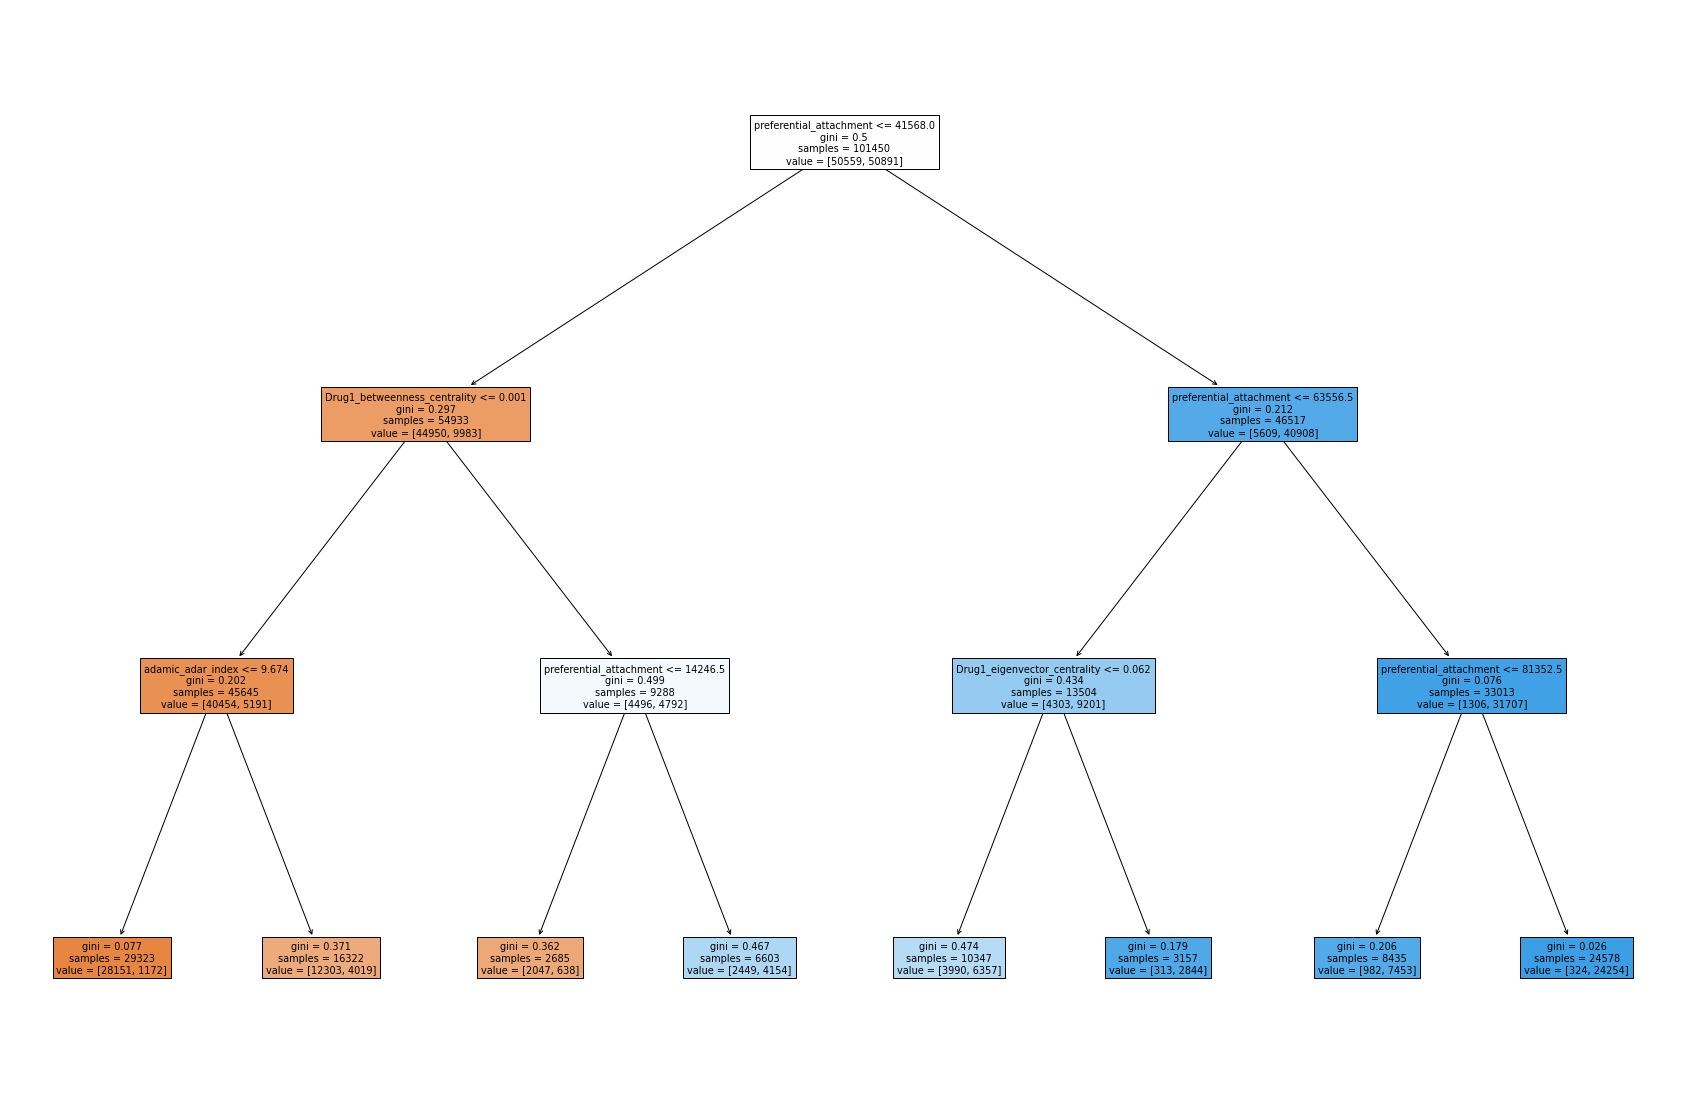

In [107]:



_, ax = plt.subplots(figsize=(30,20)) # Resize figure
tree.plot_tree(dt, filled=True, ax=ax,feature_names =X_test_arr.columns )
plt.show()

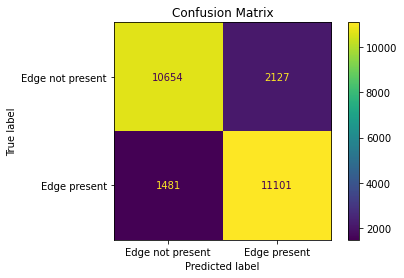

In [113]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_dt)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Edge not present", "Edge present"])
cm_display.plot()
plt.title("Confusion Matrix")

plt.show()

### Logistic regression

In [136]:
from sklearn.linear_model import LogisticRegression


In [138]:
Lr = LogisticRegression()
Lr.fit(np.array(X_train_arr),Y_train)

LogisticRegression()

In [139]:
Y_pred_lr = Lr.predict(np.array(X_test_arr))

In [ ]:
pred_prob_lr = Lr.predict_proba(np.array(X_test_arr))
LRAccuracy = accuracy_score(Y_test,Y_pred)

In [144]:
fpr1lr, tpr1lr, thresh1lr = roc_curve(Y_test, pred_prob_lr[:,1], pos_label=1)

auc_scorelr = roc_auc_score(Y_test, pred_prob_lr[:,1])
auc_scorelr

0.9427645234850336

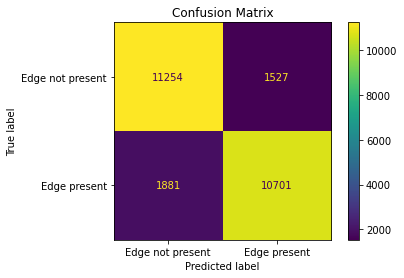

In [90]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Edge not present", "Edge present"])
cm_display.plot()
plt.title("Confusion Matrix")

plt.show()

## Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [151]:
clf.fit(X_train_arr,Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [152]:
pred = clf.predict(X_test_arr)

In [ ]:
randomforrestacc = accuracy_score(Y_test,pred)

In [73]:
clf.feature_importances_


array([0.07311579, 0.10503506, 0.05226592, 0.00798328, 0.02226155,
       0.00852922, 0.04621094, 0.01266051, 0.00823805, 0.22817154,
       0.24317499, 0.01695734, 0.1753958 ])

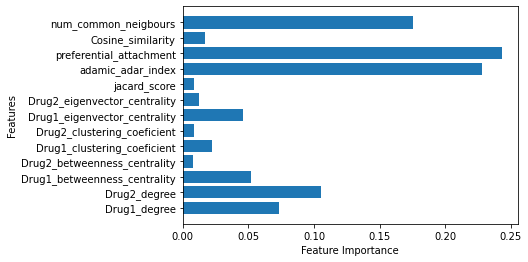

In [75]:
plt.figure("Feature Importance")
plt.barh(X_train_arr.columns, clf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")

plt.show()

In [155]:
predrf = clf.predict_proba(X_test_arr)


In [158]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1rf, tpr1rf, thresh1 = roc_curve(Y_test, predrf[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, predrf[:,1])

print(auc_score1)


0.9322236193943055


In [78]:
from sklearn.metrics import confusion_matrix


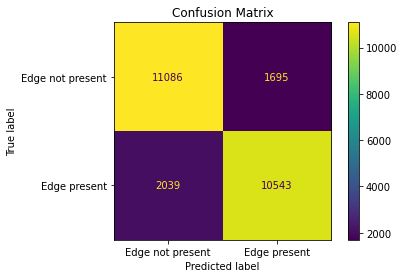

In [81]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics



confusion_matrix = metrics.confusion_matrix(Y_test, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Edge not present", "Edge present"])
cm_display.plot()
plt.title("Confusion Matrix")

plt.show()

### Model comparision 

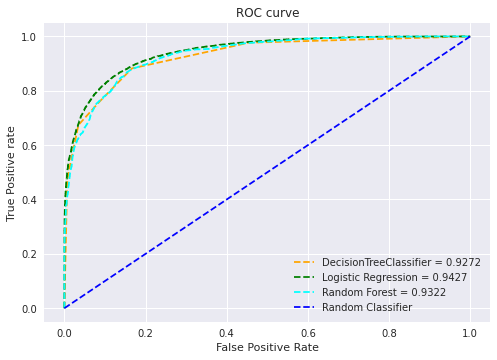

In [160]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1dt, tpr1dt, linestyle='--',color='orange', label='DecisionTreeClassifier = 0.9272')
plt.plot(fpr1lr, tpr1lr, linestyle='--',color='green', label='Logistic Regression = 0.9427')
plt.plot(fpr1rf, tpr1rf, linestyle='--',color='aqua', label='Random Forest = 0.9322')

#0.9322236193943055

#

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label = "Random Classifier")

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [162]:
!pip install prettytable

In [176]:
from prettytable import PrettyTable
x = PrettyTable()

In [177]:
x.field_names = ["Model", "Accuracy Score", "AUC_ROC score"]
x.add_rows(
    [
        ["Logistic Regression", 0.85774, 0.9272],
        ["Decision Trees", 0.86563, 0.9427],
        ["Random Forrest", 0.85277, 0.9322],
        
    ]
)

In [178]:
x

Model,Accuracy Score,AUC_ROC score
Logistic Regression,0.85774,0.9272
Decision Trees,0.86563,0.9427
Random Forrest,0.85277,0.9322
